In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import netCDF4
import numpy as np
import pandas as pd

tunit_JST = 'hours since 1968-05-23 09:00:00 GMT'
ncfile = '/Users/teruhisa/Dropbox/Data/ob500_obs_2012_obweb-1.nc'
varid = 7
s = 12

def check_obs(ncfile, varid, s):

    nc = netCDF4.Dataset(ncfile, 'r')
    var = nc.variables
    type = var['obs_type'][:]
    station = var['obs_station'][:]
    index = np.where((type==varid) & (station==s))

    time = var['obs_time'][index]
    time = netCDF4.num2date(time, tunit_JST)
    depth = var['obs_depth'][index]
    value = var['obs_value'][index]
    nc.close()
    
    data = {"time":time, "depth":depth, "value":value}
    df = pd.DataFrame(data)

    #pv = pd.pivot(index='time', columns='depth', values='value')
    #plt.pcolor(pv.index, pv.depth, pv.value.T)

    fig, ax = plt.subplots(1,1,figsize=[12,5])
    for d in range(-11,0):
        t = df.time[df.depth==d]
        v = df.value[df.depth==d]
        plt.plot(t, v, '-', color=plt.cm.RdYlBu(-d/11.0), label=d)
        plt.legend()
    plt.grid()

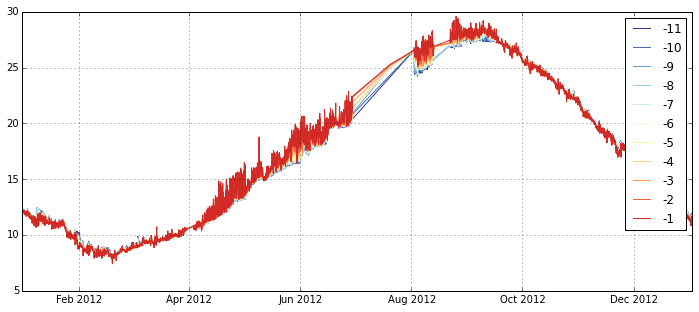

In [5]:
check_obs(ncfile, 6, 3)

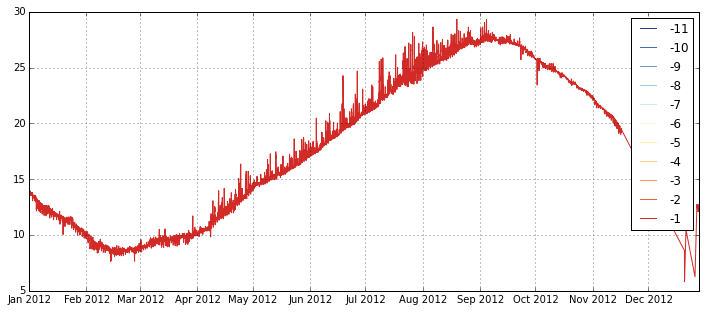

In [6]:
check_obs(ncfile, 6, 1)

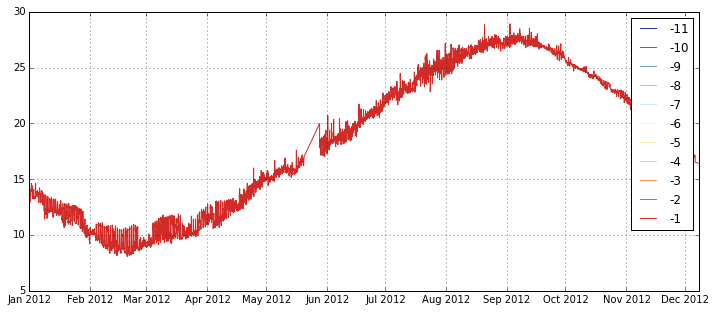

In [7]:
check_obs(ncfile, 6, 2)

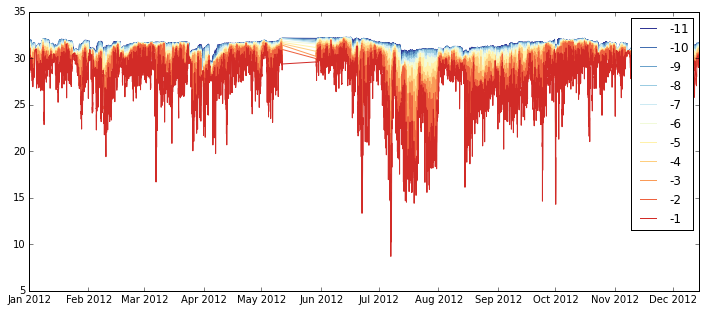

In [48]:
check_obs(ncfile, 7, 12)

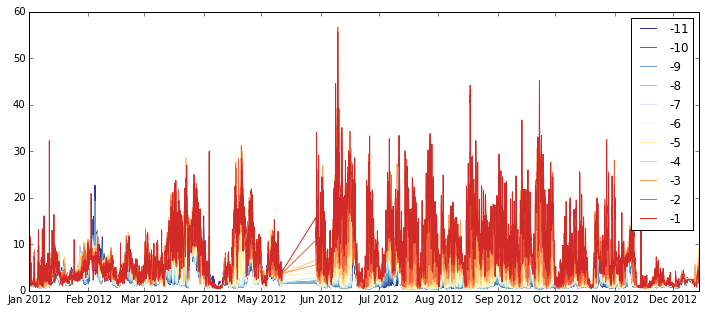

In [49]:
check_obs(ncfile, 10, 12)

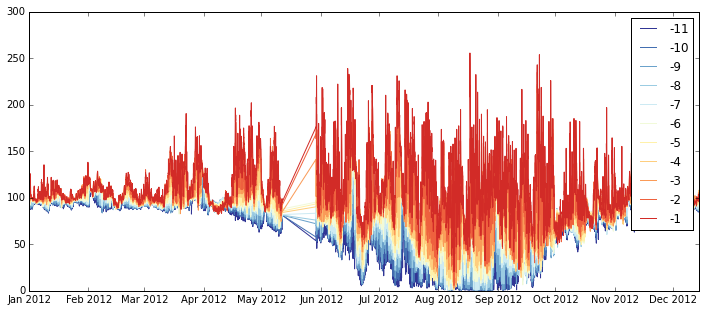

In [46]:
check_obs(ncfile, 15, 12)

In [ ]:
check_obs(ncfile, 15, 12)